Date: 3/19/24

Author: Esmeralda Hernandez

Data: Walmart Women's Clothing E-Commerce Reviews

**Research Question:**
Does Age, Rating, Department Name, Class Name have connection to the Recommended IND column? Do they have a connection with the Positive Feedback Count column?

NOTE: You will have to conduct Classification to answer the first question and Regression to answer the second.

In [34]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt

In [35]:
ecommerce_reviews = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv.zip')
ecommerce_reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### **Data Processing and Cleaning**

In [36]:
ecommerce_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [37]:
#Removed unnecessary column
ecommerce_reviews = ecommerce_reviews[['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count',
                                'Division Name', 'Department Name', 'Class Name']]
ecommerce_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [38]:
#Checking columns with NA values
ecommerce_reviews.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [39]:
#Deleting Rows where Division Name, Department Name, and Class Name are null.
ecommerce_reviews.dropna(subset=['Division Name', 'Department Name', 'Class Name'], inplace=True)
ecommerce_reviews.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3809
Review Text                 844
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [40]:
#Categories of Columns:
column_list = ['Division Name', 'Department Name', 'Class Name']

for i in column_list:
  categories = ecommerce_reviews[i].unique()
  print(i, categories, '\n')

Division Name ['Initmates' 'General' 'General Petite'] 

Department Name ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend'] 

Class Name ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises'] 



In [41]:
#Creating dummy vairables
#Division Name
dummy = {'Intimates': 1, 'General': 2, 'General Petite': 3}
ecommerce_reviews['Division Name'] = ecommerce_reviews['Division Name'].replace(dummy)

#Department Name
dummy = {'Intimate': 1, 'Dresses': 2, 'Bottoms': 3, 'Tops': 4, 'Jackets': 5, 'Trend': 6}
ecommerce_reviews['Department Name'] = ecommerce_reviews['Department Name'].replace(dummy)

#Class Name
dummy = {'Intimates': 1, 'Dresses': 2, 'Pants': 3, 'Blouses': 4, 'Knits':5, 'Outerwear': 6, 'Lounge': 7, 'Sweaters': 8, 'Skirts': 9, 'Fine gauge': 10,
         'Sleep': 11, 'Jackets': 12, 'Swim': 13, 'Trend': 14, 'Jeans': 15, 'Legwear': 16, 'Shorts': 17, 'Layering':18, 'Casual bottoms': 19, 'Chemises': 20}
ecommerce_reviews['Class Name'] = ecommerce_reviews['Class Name'].replace(dummy)

ecommerce_reviews.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,1,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,2,2,2
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,2,2,2
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,3,3,3
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,2,4,4


### **Random Forest Classification**

Does Age, Rating, Department Name, Class Name have connection to the Recommended IND column?

In [42]:
#Defining X and y variables
y1 = ecommerce_reviews[['Recommended IND']] #We want to predict if Recommended IND
X1 = ecommerce_reviews[['Age', 'Rating', 'Department Name', 'Class Name']]

In [43]:
X1_train, X1_test, y1_train, y1_test = train_test_split (X1, y1, test_size = 0.20, random_state = 1)

In [44]:
clf_forest = RandomForestClassifier(n_estimators = 100, random_state = 1) #set to creating about 100 trees

clf_forest.fit(X1_train, y1_train.values.ravel()) #added values.ravel() to convert y1_train to an array then to a flattened array

RandomForestClassifier(random_state=1)

In [45]:
y1_pred = clf_forest.predict(X1_test)

print("Confusion Matrix for RandomForestClassifer()", ":\n", confusion_matrix(y1_test, y1_pred), "\n")
print("Accuracy Score: ", accuracy_score(y1_test, y1_pred))

Confusion Matrix for RandomForestClassifer() :
 [[ 698  154]
 [ 210 3633]] 

Accuracy Score:  0.9224707135250266


### Feature Importance of Model's Independend Variables

In [46]:
#Feature Importance
clf_importance = clf_forest.feature_importances_ #get feature importance for each independent variable in the classification tree

clf_feat_importances = pd.Series(clf_importance, index=X1.columns)

print(f"Random Forest Classification Feature Importance:\n{clf_feat_importances}")

Random Forest Classification Feature Importance:
Age                0.093959
Rating             0.878778
Department Name    0.007538
Class Name         0.019726
dtype: float64


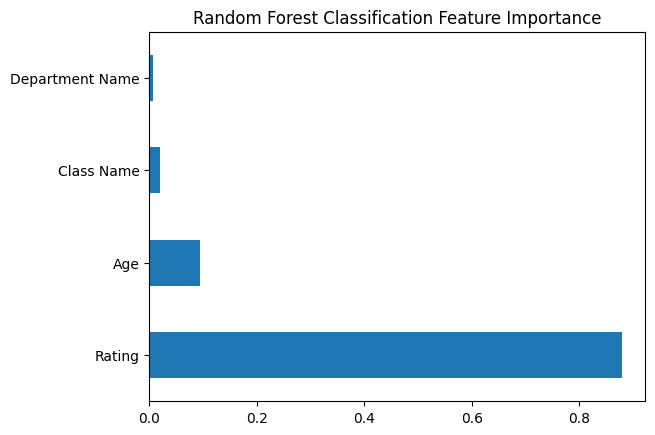

In [47]:
#Visualizing Feature Importance
clf_feat_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest Classification Feature Importance')
plt.show()

### **Random Forest Regression**

Do they have a connection with the Positive Feedback Count column?

In [48]:
#Defining X and y variables
y2 = ecommerce_reviews[['Positive Feedback Count']] #We want to predict if Positive Feedback Count
X2 = ecommerce_reviews[['Age', 'Rating', 'Department Name', 'Class Name']]

In [49]:
X2_train, X2_test, y2_train, y2_test = train_test_split (X2, y2, test_size = 0.20, random_state = 1)

In [50]:
reg_forest = RandomForestRegressor(n_estimators=100, random_state = 1)

reg_forest.fit(X2_train, y2_train.values.ravel())

RandomForestRegressor(random_state=1)

In [51]:
#Root Mean Squared Error
y2_pred = reg_forest.predict(X2_test)
mse = mean_squared_error(y2_test, y2_pred)
rmse = sqrt(mse)
print("Root Mean Squared Error for Random Froest Regression:", rmse)

Root Mean Squared Error for Random Froest Regression: 5.966741302801777


### Feature Importance of Model's Independent Variables

---



In [52]:
#Feature Importance
reg_importance = reg_forest.feature_importances_ #get feature importance for each independent variable in the regression tree

reg_feat_importances = pd.Series(reg_importance, index=X2.columns)

print(f"Random Forest Regression Feature Importance:\n{reg_feat_importances}")

Random Forest Regression Feature Importance:
Age                0.508281
Rating             0.210735
Department Name    0.078582
Class Name         0.202403
dtype: float64


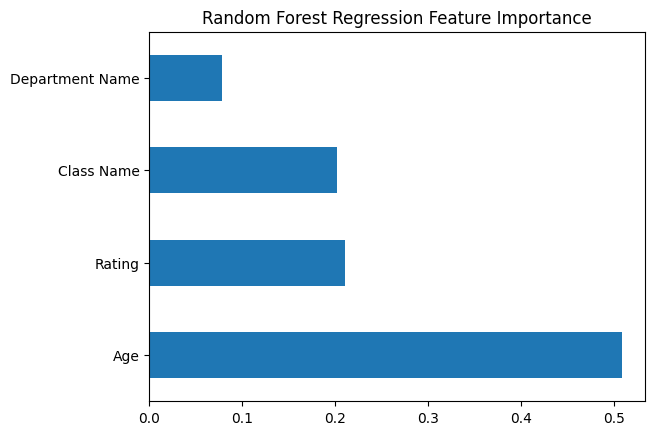

In [53]:
#Visualizing Feature Importance
reg_feat_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest Regression Feature Importance')
plt.show()